In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [3]:
data = pd.read_csv('city_day.csv')

In [5]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [6]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [9]:
#url = 'https://api.openweathermap.org/data/2.5/air_pollution/history?lat=21&lon=77.1&start=1604169000&end=1635705000&appid=08a74ea90aeda287a529e19ab5975d38'


In [ ]:
#url = 'http://api.openweathermap.org/data/2.5/air_pollution?lat=21&lon=77.1&appid=08a74ea90aeda287a529e19ab5975d38'

In [17]:
clean_data = data.drop(['City', 'Date','NOx','Benzene','Toluene','Xylene','AQI_Bucket'], axis=1)

In [19]:
#using only the useful and inportant components
clean_data.head()

,PM2.5,PM10,NO,NO2,NH3,CO,SO2,O3,AQI
0,NaN,NaN,0.92,18.22,NaN,0.92,27.64,133.36,NaN
1,NaN,NaN,0.97,15.69,NaN,0.97,24.55,34.06,NaN
2,NaN,NaN,17.40,19.30,NaN,17.40,29.07,30.70,NaN
3,NaN,NaN,1.70,18.48,NaN,1.70,18.59,36.08,NaN
4,NaN,NaN,22.10,21.42,NaN,22.10,39.33,39.31,NaN


In [22]:
len(clean_data)

29531

In [21]:
clean_data.isnull().sum()

PM2.5     4598
PM10     11140
NO        3582
NO2       3585
NH3      10328
CO        2059
SO2       3854
O3        4022
AQI       4681
dtype: int64

In [26]:
clean_data = clean_data.dropna()

In [27]:
clean_data.isnull().sum()

PM2.5    0
PM10     0
NO       0
NO2      0
NH3      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [28]:
clean_data.head()

,PM2.5,PM10,NO,NO2,NH3,CO,SO2,O3,AQI
2010,31.21,38.66,7.20,1.27,25.63,0.56,4.22,2.81,52.0
2011,38.39,46.68,7.19,0.91,29.16,0.57,4.46,0.18,60.0
2012,43.23,50.83,7.14,1.07,28.95,0.57,4.53,0.41,62.0
2013,33.82,41.03,7.09,0.36,28.41,0.48,4.63,0.30,70.0
2014,27.14,35.04,5.63,2.32,23.98,0.50,4.71,13.02,54.0


In [30]:
from sklearn.model_selection import train_test_split

x = clean_data.drop('AQI', axis=1)
y = clean_data['AQI']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
#Import variouse regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('SVR', SVR()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('Ada Boost', AdaBoostRegressor()),
    ('Lasso', Lasso()),
    ('Ridge', Ridge()),
    ('Elastic Net', ElasticNet())
]

model_results = {'Model': [], 'MAE': [], 'MSE': [], 'R2 Score': []}

for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append results to the dictionary
    model_results['Model'].append(name)
    model_results['MAE'].append(mae)
    model_results['MSE'].append(mse)
    model_results['R2 Score'].append(r2)

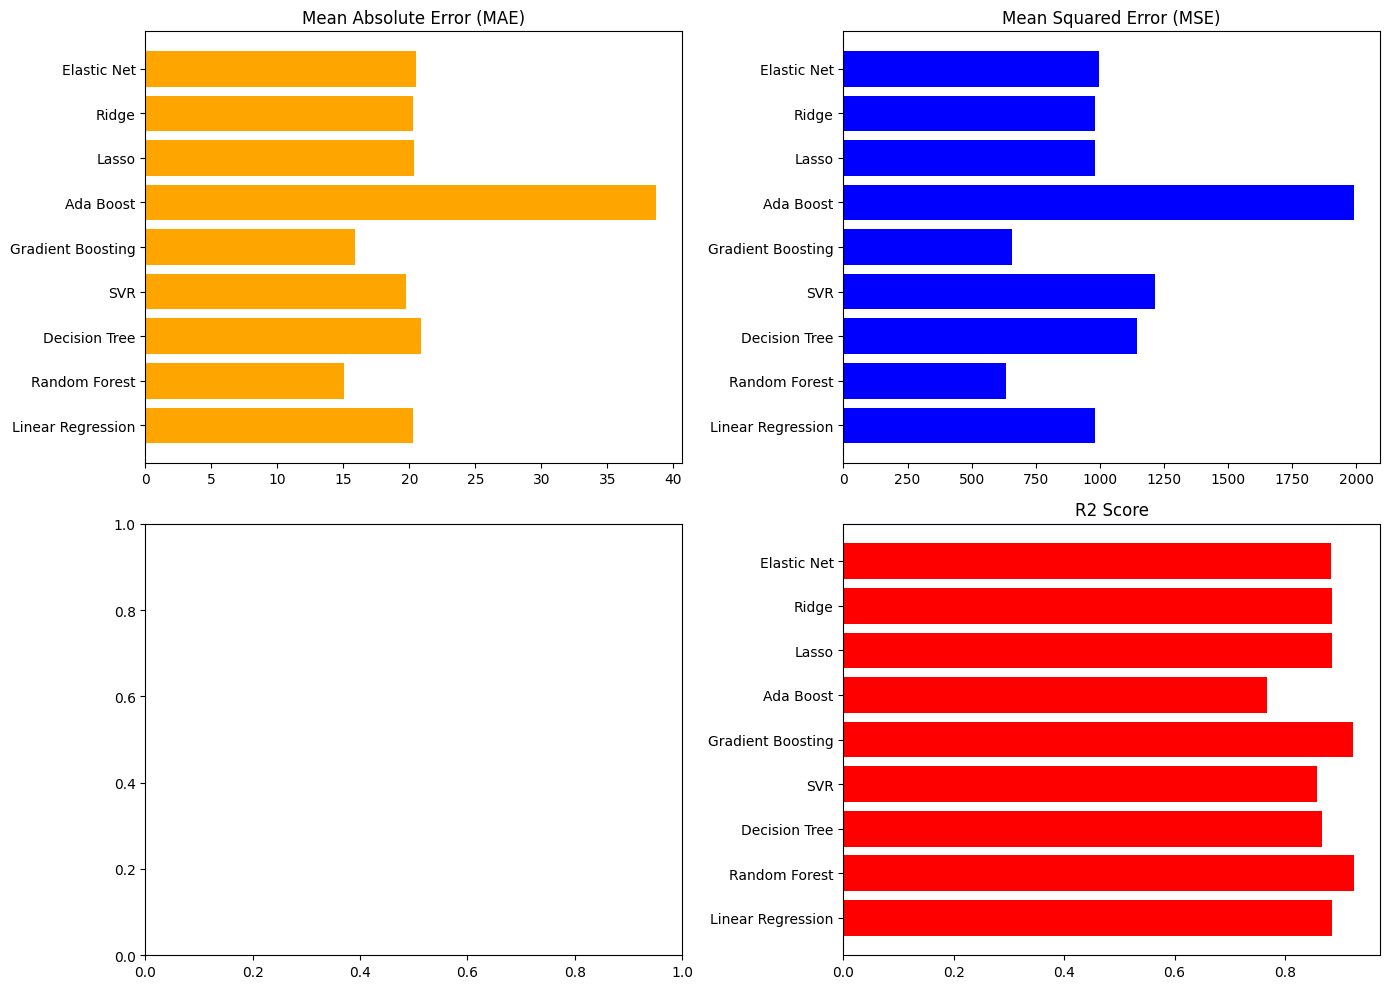

In [36]:
# Convert results to a DataFrame for visualization
results_df = pd.DataFrame(model_results)

# Plotting comparison of models
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# MAE
ax[0, 0].barh(results_df['Model'], results_df['MAE'], color='orange')
ax[0, 0].set_title('Mean Absolute Error (MAE)')

# MSE
ax[0, 1].barh(results_df['Model'], results_df['MSE'], color='blue')
ax[0, 1].set_title('Mean Squared Error (MSE)')

# R2 Score
ax[1, 1].barh(results_df['Model'], results_df['R2 Score'], color='red')
ax[1, 1].set_title('R2 Score')

plt.tight_layout()
plt.show()

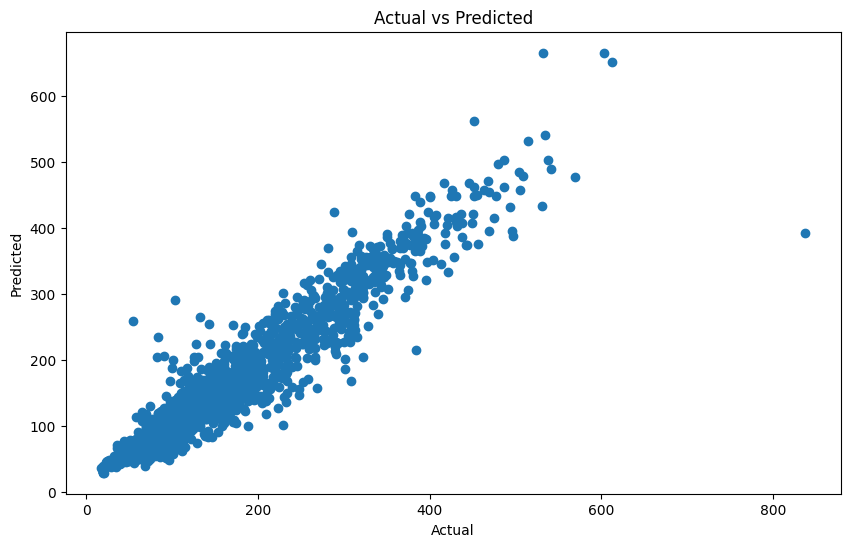

In [37]:
# Based on low MAE & MSE and high R2 Score, Gradient Boosting Regressor is the best model
# Let's use it to make predictions
model = GradientBoostingRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


In [39]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [100, 200],  # Fewer values for n_estimators
    'learning_rate': [0.01, 0.1],  # Fewer values for learning_rate
    'max_depth': [3, 5],  # Fewer values for max_depth
    'min_samples_split': [2, 5],  # Fewer values for min_samples_split
    'subsample': [0.8, 1.0]  # Fewer values for subsample
}

# Use RandomizedSearchCV instead of GridSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
                                   n_iter=50, cv=5, scoring='r2', n_jobs=-1, verbose=1, random_state=42)

random_search.fit(x_train, y_train)

# Best hyperparameters and best cross-validation R² score
best_params_random = random_search.best_params_
best_cv_r2_random = random_search.best_score_

best_params_random, best_cv_r2_random


c:\Users\Rxghav1103\Desktop\AQI Prediction\aqi\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 32 is smaller than n_iter=50. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 32 candidates, totalling 160 fits


({'subsample': 0.8,
  'n_estimators': 100,
  'min_samples_split': 2,
  'max_depth': 5,
  'learning_rate': 0.1},
 np.float64(0.9243207652741356))

In [40]:
# Create the final model with the best hyperparameters
final_model = GradientBoostingRegressor(
    subsample=0.8,
    n_estimators=100,
    min_samples_split=2,
    max_depth=5,
    learning_rate=0.1
)

# Train the final model
final_model.fit(x_train, y_train)

# Predict on the test set
y_pred_final = final_model.predict(x_test)

# Calculate R² score on the test set
final_r2_score = r2_score(y_test, y_pred_final)

final_r2_score


0.9292204693995766

In [62]:
# Get today's data
url = 'http://api.openweathermap.org/data/2.5/air_pollution?lat=21&lon=77.1&appid=08a74ea90aeda287a529e19ab5975d38'
response = requests.get(url)

# Check if the response is successful
if response.status_code == 200:
    result = response.json()
    rtdata = result['list'][0]['components']
    
    # Convert keys to match the training data feature names
    adjusted_rtdata = {
        'PM2.5': rtdata['pm2_5'],
        'PM10': rtdata['pm10'],
        'NO': rtdata['no'],
        'NO2': rtdata['no2'],
        'NH3': rtdata['nh3'],
        'CO': rtdata['co'],
        'SO2': rtdata['so2'],
        'O3': rtdata['o3'],
    }
    
    print(adjusted_rtdata)


{'PM2.5': 68.25, 'PM10': 81.01, 'NO': 0.63, 'NO2': 5.4, 'NH3': 8.36, 'CO': 527.38, 'SO2': 10.13, 'O3': 133.04}


In [63]:
rtinp = pd.DataFrame([adjusted_rtdata])

In [64]:
rtinp

,PM2.5,PM10,NO,NO2,NH3,CO,SO2,O3
0,68.25,81.01,0.63,5.4,8.36,527.38,10.13,133.04


In [65]:
x_train.head(1)

,PM2.5,PM10,NO,NO2,NH3,CO,SO2,O3
10669,67.63,152.46,21.36,36.61,29.89,1.14,17.04,48.58


In [66]:
rtpred = final_model.predict(rtinp)

In [67]:
rtpred

array([268.45164295])

In [68]:
import joblib

# Save the trained model to a file
joblib.dump(final_model, 'gradient_boosting_model.joblib')


['gradient_boosting_model.joblib']